****#### **Import all necessary libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Data loading**

##### List first five samples

In [105]:
df = pd.read_csv("../_data/tb-rsqa.csv", encoding="ISO-8859-1")

#### List of Columns

In [106]:
for col in df.columns:
    print(col)

Name of Supervisor 1
Name of Supervisor 2
HF Name
GeneXpert-site
HF Type
HF TB Type
Province
District
Sub_District
Period of implementation
FY
Domaine d'activités du NSP 2013-2018
Summary group
Category of activity
No_Old
NO
Normes 
Element à verifier
Procedures 
Num
Den
% (don't use)
Commentaires
How many Times


### **Data Cleaning**

In [107]:
df = df.copy()

#### 1. Extra relevant columns

In [108]:
relevant_columns = ["Province", "District", "HF TB Type", "HF Name", "HF Type", "GeneXpert-site", "FY", "Summary group", "NO", "Normes ", "Element à verifier", "Num", "Den"]
new_df = df[relevant_columns]
new_df.shape[0]

25647

In [109]:
new_df.head()

,Province,District,HF TB Type,HF Name,HF Type,GeneXpert-site,FY,Summary group,NO,Normes,Element à verifier,Num,Den
0,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,"Are algorithms for TB screening, TB diagnosis ...",1,Toute FOSA doit rendre disponible des algorith...,"Les services VIH/ARV, Consultations externes, ...",3,4
1,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,"Are TB monitoring tools existing, update and w...",2,Les prestataires doivent avoir les connaissanc...,"Les prestataires des services ARV, Consultatio...",4,4
2,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,Is active case finding conducted in TB high ri...,3,NaN,Sur 10 nouveaux prisonniers entrés au cours de...,NaN,10
3,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,Is active case finding conducted in TB high ri...,4,NaN,Sur 10 nouveaux prisonniers sortants au cours ...,NaN,10
4,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,Are TB diagnostics continuously functional (mi...,5,NaN,Sur les 10 derniers patients hospitalises( 5 p...,NaN,10


#### 2. Handling Duplicates

In [110]:
duplicates = new_df[new_df.duplicated()]
print("No duplicates: ", duplicates.shape[0])
new_df = new_df.drop_duplicates()

No duplicates:  176


#### 3. Handling missing values

total number of missing values

In [111]:
print("No. missing values: ", new_df.isnull().sum())

No. missing values:  Province                 0
District                 0
HF TB Type               0
HF Name                  0
HF Type                  0
GeneXpert-site           0
FY                       0
Summary group            0
NO                       0
Normes                9711
Element à verifier    1089
Num                   4613
Den                   2201
dtype: int64


Replacing missing normes by element

In [112]:
new_df["Element à verifier"] = new_df["Element à verifier"].fillna(new_df["Normes "])

#### 4. Rename columns

In [113]:
new_df.rename(columns={
    'Province': 'province',
    'District': 'district',
    'HF TB Type': 'hf_tb_type',
    'HF Name': 'hf_name',
    'HF Type': 'hf_type',
    'FY': 'fy',
    'Summary group': 'summary_group',
    'NO': 'no',
    'Normes ': 'normes',
    'Element à verifier': 'item_name',
    'Num': 'num',
    'Den': 'den',
    'GeneXpert-site': 'genexpert_site'
}, inplace=True)
new_df.head()


,province,district,hf_tb_type,hf_name,hf_type,genexpert_site,fy,summary_group,no,normes,item_name,num,den
0,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,"Are algorithms for TB screening, TB diagnosis ...",1,Toute FOSA doit rendre disponible des algorith...,"Les services VIH/ARV, Consultations externes, ...",3,4
1,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,"Are TB monitoring tools existing, update and w...",2,Les prestataires doivent avoir les connaissanc...,"Les prestataires des services ARV, Consultatio...",4,4
2,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,Is active case finding conducted in TB high ri...,3,NaN,Sur 10 nouveaux prisonniers entrés au cours de...,NaN,10
3,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,Is active case finding conducted in TB high ri...,4,NaN,Sur 10 nouveaux prisonniers sortants au cours ...,NaN,10
4,North,Gakenke,CT,Ruli CS,Health Center,NO,FY 2020-2021,Are TB diagnostics continuously functional (mi...,5,NaN,Sur les 10 derniers patients hospitalises( 5 p...,NaN,10


##### 5. Data Types Validation

In [114]:
new_df["num"] = pd.to_numeric(new_df["num"], errors="coerce")
new_df["den"] = pd.to_numeric(new_df["den"], errors="coerce")

##### 6. Clean `fiscal year` variable

remove `FY - prefix`

In [115]:
new_df['fy'].value_counts()

fy
FY 2023-2024    7016
FY 2020-2021    6969
FY 2021-2022    6486
FY 2022-2023    2723
2023-2024       2277
Name: count, dtype: int64

In [116]:
new_df["fy"] = new_df["fy"].str.replace("FY ", "", regex=False)
print(new_df['fy'].unique())
print(new_df['fy'].value_counts())


['2020-2021' '2021-2022' '2022-2023' '2023-2024']
fy
2023-2024    9293
2020-2021    6969
2021-2022    6486
2022-2023    2723
Name: count, dtype: int64


#### 7. Remove `Prison` and `Teaching Hospital` data

In [117]:
filtered_df = new_df[~new_df['hf_type'].isin(['Prison', 'Teaching Hospital'])]
new_df = filtered_df
new_df.shape[0]

24490

`7.1 Drop Butare CHC`

In [118]:
new_df = new_df.loc[new_df['hf_name'] != "Butare Chu Hnr (huye)"]
new_df = new_df.loc[new_df['hf_name'] != "kanombe RH"]


`7.2 Set Gwinkavu DH` as a Hospital

In [119]:
new_df.loc[new_df['hf_name'] == 'gwinkwavu DH', 'hf_type'] = 'Hospital (DH,PH,RH)'


7.3 Set `Kiziguro DH` to `Hospital`

In [120]:
new_df.loc[:, 'hf_name'] = new_df['hf_name'].str.lower()

In [121]:
new_df.loc[new_df['hf_name'] == 'kiziguro dh', 'hf_type'] = 'Hospital (DH,PH,RH)'

`8. Interchange mistakened Hospitals by actual health centers`

In [122]:
new_df.loc[(new_df['hf_tb_type'] == 'CT') & (new_df['hf_type'] == 'Hospital (DH,PH,RH)'), 'hf_type'] = 'Health Center'
new_df.shape

(24349, 13)

#### **Feature Engineering**

In [123]:
# gen_df = pd.read_csv("../_data/tb-rsqa_GXP.csv")
# gen_df.rename({ "ddd": "hf_type" }, axis=1, inplace=True)
# gen_df.loc[:, 'hf_type'] = gen_df['hf_type'].str.lower()
# gen_df.loc[:, 'Genexpert.site'] = gen_df['Genexpert.site'].str.lower()
new_df.loc[:, 'hf_type'] = new_df['hf_type'].str.lower()

In [124]:
new_df.hf_type.unique()

array(['health center', 'hospital (dh,ph,rh)'], dtype=object)

In [125]:
# # Create a set of tuples with the site name and hf_type from gen_df for faster lookup
# genexpert_sites = set(zip(gen_df['Genexpert.site'], gen_df['hf_type']))

# # Create a function to check if a facility exists in gen_df with the same hf_type
# def check_facility(row):
#     if (row['hf_name'], row['hf_type']) in genexpert_sites:
#         return 'yes'
#     else:
#         return 'no'

# # Apply the function to create the new column
# new_df['genexpert_or_microscopy'] = new_df.apply(check_facility, axis=1)
# new_df.loc[new_df['hf_type'] == 'hospital (dh,ph,rh)', 'genexpert_or_microscopy'] = 'yes'

In [126]:
new_df['genexpert_site'].value_counts()

genexpert_site
NO     17257
YES     7092
Name: count, dtype: int64

In [127]:
# gen_df.columns

In [128]:
# gen_df.iloc[1][0]

In [129]:
# # Get all unique health facility names from gen_df that you want to check
# hf_names_to_check = gen_df.iloc[:, 0].unique()

# # Filter the new_df dataframe in one operation
# filtered_facilities = new_df[
#     (new_df['hf_name'].isin(hf_names_to_check)) &
#     (new_df['hf_type'] == "health center") &
#     (new_df['hf_tb_type'] == "CT")
# ]['hf_name'].unique()

# print(filtered_facilities)

In [130]:
new_df.loc[new_df['hf_name'] == 'nyamirama cs', 'hf_tb_type'] = 'CDT'
new_df.loc[new_df['hf_name'] == 'byahi (rubavu) cs', 'hf_tb_type'] = 'CDT'

### **Validation**

In [131]:
duplicates = new_df[new_df.duplicated()]
print("No. duplicates: ", duplicates.shape[0])
print("No. missing values: ", new_df.isnull().sum())

No. duplicates:  0
No. missing values:  province             0
district             0
hf_tb_type           0
hf_name              0
hf_type              0
genexpert_site       0
fy                   0
summary_group        0
no                   0
normes            9283
item_name            0
num               4459
den               2127
dtype: int64


In [132]:
new_df.shape

(24349, 13)

In [133]:
stop here!

SyntaxError: invalid syntax (2745754519.py, line 1)

In [ ]:
new_df.to_csv("../_data/tb-rsqa-cleaned.csv", index=False)

#### **Descriptive Analysis**

Total number of health facitilities

In [ ]:
new_df['hf_name'].unique().shape

(231,)

`Overall Score`

In [ ]:
overall_score = (new_df["num"].sum() / new_df["den"].sum()) * 100
overall_score


64.87338352364829

`Overall Score by health facility`

In [ ]:
hf_scores = new_df.groupby("hf_name").apply(lambda x: (x["num"].sum() / x["den"].sum()) * 100)
hf_scores

hf_name
 byimana cs        91.428571
 gitwe dh          77.224199
 nyagatare dh      53.667172
agahabwa cs        88.786544
avega kigali cs    36.454849
                     ...    
shyira dh          82.781457
simbi cs           69.461078
tare cs            67.136150
tumba cs           66.820276
zaza cs            69.902913
Length: 231, dtype: float64

convert to hf_scores to a dataframe

In [ ]:
hf_scores_df = hf_scores.reset_index(name="overall_score")
hf_scores.head()

hf_name
 byimana cs        91.428571
 gitwe dh          77.224199
 nyagatare dh      53.667172
agahabwa cs        88.786544
avega kigali cs    36.454849
dtype: float64

### **Data visualization**

`The Top 10 Highest Scoring Health Facilities`

In [ ]:
top_10_highest = hf_scores_df.sort_values(by="overall_score", ascending=False).head(10)

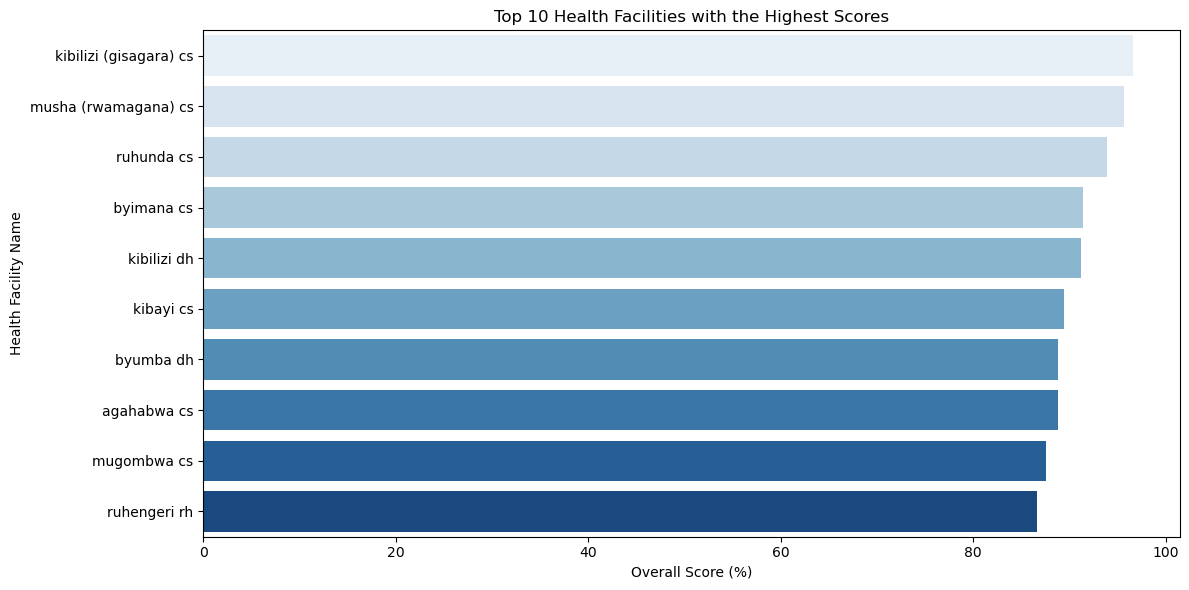

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y="hf_name", x="overall_score", data=top_10_highest, palette="Blues")
plt.title("Top 10 Health Facilities with the Highest Scores")
plt.xlabel("Overall Score (%)")
plt.ylabel("Health Facility Name")
plt.tight_layout()
plt.show()

`The Top 10 Lowest Scoring Health Facilities`

In [ ]:
top_10_lowest = hf_scores_df.sort_values(by="overall_score", ascending=True).head(10)

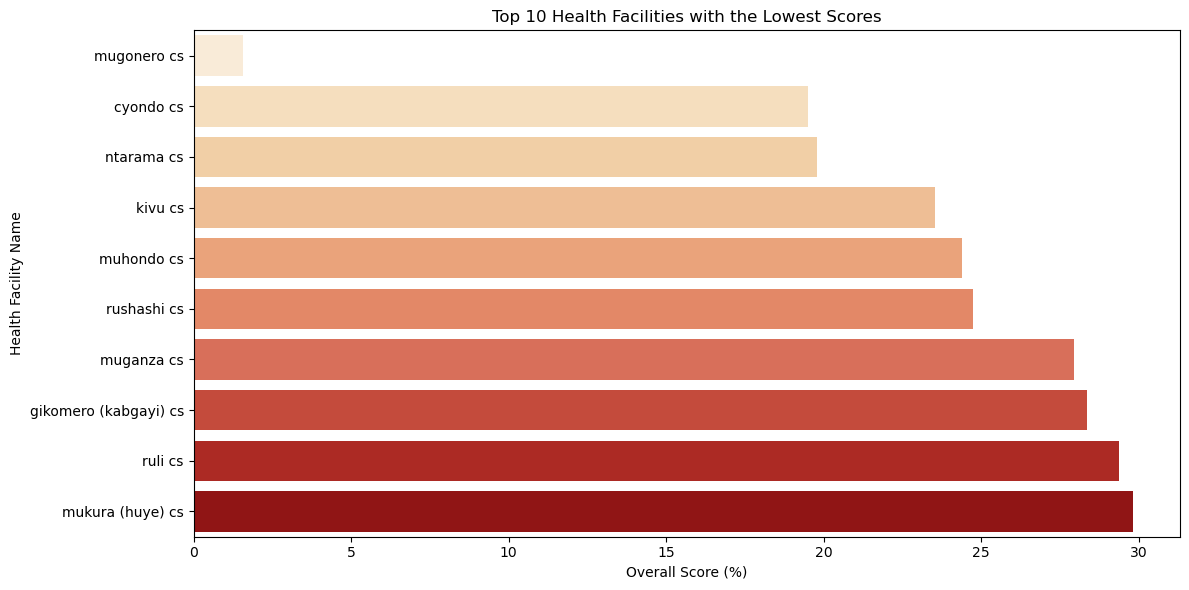

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="overall_score", y="hf_name", data=top_10_lowest, palette="OrRd")
plt.title("Top 10 Health Facilities with the Lowest Scores")
plt.xlabel("Overall Score (%)")
plt.ylabel("Health Facility Name")
plt.tight_layout()
plt.show()

`Distribution of Health Facility Type`

In [ ]:
ht_scores = new_df.groupby('hf_type').apply(lambda x: (x["num"].sum() / x["den"].sum()) * 100)
ht_scores_df = ht_scores.reset_index(name="overall_score")
ht_scores_df.head()

,hf_type,overall_score
0,health center,60.843900
1,"hospital (dh,ph,rh)",74.782717


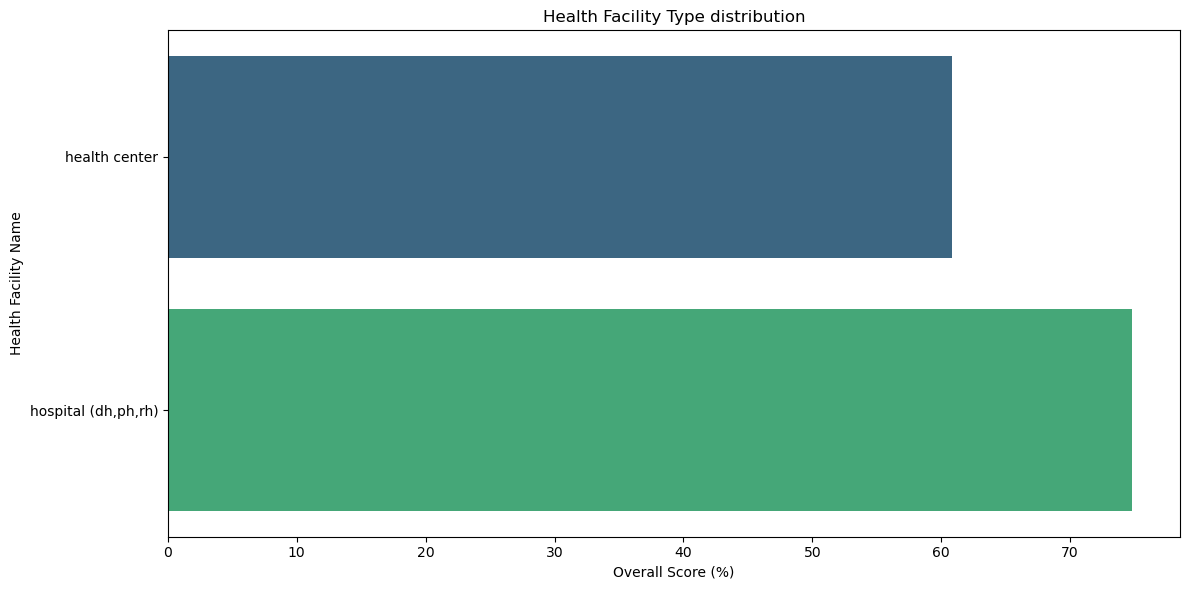

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="overall_score", y="hf_type", data=ht_scores_df, palette="viridis")
plt.title("Health Facility Type distribution")
plt.xlabel("Overall Score (%)")
plt.ylabel("Health Facility Name")
plt.tight_layout()
plt.show()

`Overall Trend`

In [ ]:
new_df['fy_year'] = new_df['fy'].str.extract(r'(\d{4})').astype(int)
new_df['fy_year'].unique()

array([2020, 2021, 2022, 2023])

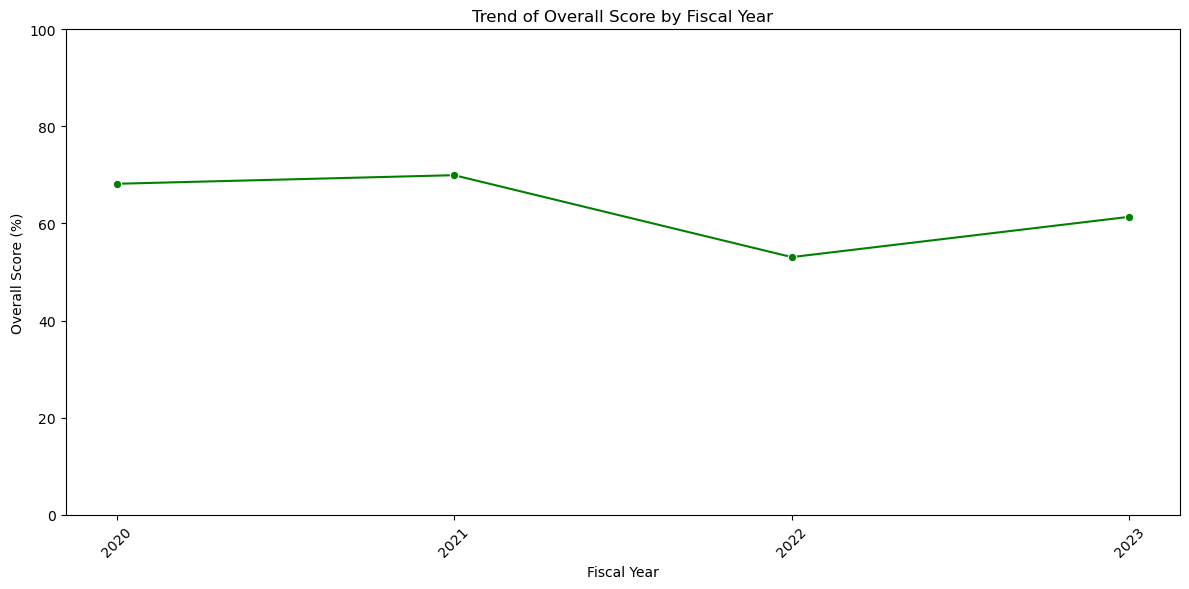

In [ ]:
fy_scores = new_df.groupby('fy_year').apply(lambda x: (x["num"].sum() / x["den"].sum()) * 100).reset_index(name="overall_score")

# Plot the trend of overall scores by fiscal year
plt.figure(figsize=(12, 6))
sns.lineplot(x='fy_year', y='overall_score', data=fy_scores, marker='o', color='g')
plt.ylim(0.0, 100.0)
plt.title("Trend of Overall Score by Fiscal Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Overall Score (%)")
plt.xticks(fy_scores['fy_year'], rotation=45)
plt.tight_layout()
plt.show()


### **Day II**

#### Grouping by unique `summary_group`

grouping

In [ ]:
summary_item_scores = (
    new_df.groupby(
        ['summary_group', 'item_name', 'hf_name', 'hf_type', 'fy']
    )
    .agg({'num': 'sum', 'den': 'sum'})
    .reset_index()
)

In [ ]:
summary_item_scores.head()

,summary_group,item_name,hf_name,hf_type,fy,num,den
0,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,byimana cs,health center,2020-2021,0.0,0.0
1,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,gitwe dh,"hospital (dh,ph,rh)",2020-2021,0.0,0.0
2,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,nyagatare dh,health center,2020-2021,0.0,0.0
3,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,agahabwa cs,health center,2020-2021,0.0,0.0
4,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,agahabwa cs,health center,2021-2022,0.0,0.0


`average score`

In [ ]:
# Compute the average score as (sum of num / sum of den) * 100
summary_item_scores['avg_score'] = (summary_item_scores['num'] / summary_item_scores['den']) * 100

`Screening, Diagnosis, and Treatment`

In [ ]:
# Define mapping of summary_group to section
section_mapping = {
    "Is active case finding conducted in TB high risk groups?[Questions 2, 8 and 9]": "screening",
    "Are TB diagnostics continuously functional (microscopy and Expert) and their results available timely (microscopy, expert and culture)?[Questions 3, 4, 5, 6 and 7]": "diagnosis",
    "Are TB patients early initiated on TB treatment and on ART (if indicated), and their bacteriological control performed according to guidelines?[Questions 16, 17, 18 and 19]": "treatment",
    "Does the BMI monitored for TB Patients and nutritional support provided to the eligible patients?[Questions New_70 and New_71]": "treatment"
}

summary_item_scores["section"] = summary_item_scores["summary_group"].map(section_mapping)

In [ ]:
summary_item_scores.head()

,summary_group,item_name,hf_name,hf_type,fy,num,den,avg_score,section
0,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,byimana cs,health center,2020-2021,0.0,0.0,NaN,NaN
1,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,gitwe dh,"hospital (dh,ph,rh)",2020-2021,0.0,0.0,NaN,NaN
2,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,nyagatare dh,health center,2020-2021,0.0,0.0,NaN,NaN
3,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,agahabwa cs,health center,2020-2021,0.0,0.0,NaN,NaN
4,Active drug safety monitoring and management (...,Pour les cas TB qui ont eu des effets secondai...,agahabwa cs,health center,2021-2022,0.0,0.0,NaN,NaN


` Filter rows where section is either 'screening', 'treatment', or 'diagnostic'`

In [ ]:
# Filter rows where section is either 'screening', 'treatment', or 'diagnostic'
filtered_summary = summary_item_scores[summary_item_scores["section"].isin(["screening", "treatment", "diagnosis"])]
filtered_summary

# Display the filtered DataFrame
# filtered_summary.to_csv("../output/filtered_summary.csv", index=False)


,summary_group,item_name,hf_name,hf_type,fy,num,den,avg_score,section
1003,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",byimana cs,health center,2020-2021,30.0,30.0,100.0,diagnosis
1004,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",gitwe dh,"hospital (dh,ph,rh)",2020-2021,30.0,30.0,100.0,diagnosis
1005,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",nyagatare dh,health center,2020-2021,30.0,30.0,100.0,diagnosis
1006,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",agahabwa cs,health center,2020-2021,0.0,30.0,0.0,diagnosis
1007,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",agahabwa cs,health center,2021-2022,30.0,30.0,100.0,diagnosis
...,...,...,...,...,...,...,...,...,...
19159,Is active case finding conducted in TB high ri...,Verifier les enfants de moins de 5 ans TB cont...,simbi cs,health center,2020-2021,5.0,5.0,100.0,screening
19160,Is active case finding conducted in TB high ri...,Verifier les enfants de moins de 5 ans TB cont...,simbi cs,health center,2021-2022,5.0,5.0,100.0,screening
19161,Is active case finding conducted in TB high ri...,Verifier les enfants de moins de 5 ans TB cont...,tare cs,health center,2020-2021,5.0,5.0,100.0,screening
19162,Is active case finding conducted in TB high ri...,Verifier les enfants de moins de 5 ans TB cont...,tumba cs,health center,2020-2021,2.0,5.0,40.0,screening


`remove prisoners samples`

In [ ]:
# Define the items to exclude
items_to_exclude = [
    "Sur 10 nouveaux prisonniers entrÃ©s au cours de la pÃ©riode evaluÃ©e, combien ont beneficiÃ© du screening TB Ã¡ l'entrÃ©e",
    "Sur 10 nouveaux prisonniers sortants au cours de la pÃ©riode evaluÃ©e, combien ont beneficiÃ© du screening TB Ã¡ la sortie"
]

# Filter out rows where item_name is in items_to_exclude
filtered_summary = filtered_summary[~filtered_summary["item_name"].isin(items_to_exclude)]

In [ ]:
filtered_summary.head()

,summary_group,item_name,hf_name,hf_type,fy,num,den,avg_score,section
1003,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",byimana cs,health center,2020-2021,30.0,30.0,100.0,diagnosis
1004,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",gitwe dh,"hospital (dh,ph,rh)",2020-2021,30.0,30.0,100.0,diagnosis
1005,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",nyagatare dh,health center,2020-2021,30.0,30.0,100.0,diagnosis
1006,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",agahabwa cs,health center,2020-2021,0.0,30.0,0.0,diagnosis
1007,Are TB diagnostics continuously functional (mi...,"Durant le mois passé, combien de jours le micr...",agahabwa cs,health center,2021-2022,30.0,30.0,100.0,diagnosis


`group by HF_type and fy`

`group by fiscal year`

In [ ]:
# Group by fiscal year (fy) and calculate the overall score
fy_summary = filtered_summary.groupby(
    ['fy', 'hf_type', 'section']
).apply(lambda x: (x["num"].sum() / x["den"].sum()) * 100).reset_index(name="overall_score")
fy_summary
# Display the grouped DataFrame
# fy_summary.to_csv("../output/fy_summary.csv", index=False)


,fy,hf_type,section,overall_score
0,2020-2021,health center,diagnosis,55.287137
1,2020-2021,health center,screening,75.106838
2,2020-2021,health center,treatment,78.466227
3,2020-2021,"hospital (dh,ph,rh)",diagnosis,83.333333
4,2020-2021,"hospital (dh,ph,rh)",screening,60.661765
5,2020-2021,"hospital (dh,ph,rh)",treatment,82.956522
6,2021-2022,health center,diagnosis,36.941733
7,2021-2022,health center,screening,68.648398
8,2021-2022,health center,treatment,71.111111
9,2021-2022,"hospital (dh,ph,rh)",diagnosis,80.077745


`Health Facility Type Count`

In [ ]:
hf_counts = new_df.groupby(["fy", "hf_type"])["hf_name"].nunique().reset_index(name="hf_count")
overall_scores = new_df.groupby(["fy", "hf_type"]).apply(lambda x: (x["num"].sum() / x["den"].sum()) * 100).reset_index(name="overall_score")
result_df = pd.merge(hf_counts, overall_scores, on=["fy", "hf_type"], how="left")
result_df


,fy,hf_type,hf_count,overall_score
0,2020-2021,health center,74,64.020244
1,2020-2021,"hospital (dh,ph,rh)",21,83.143724
2,2021-2022,health center,69,67.834286
3,2021-2022,"hospital (dh,ph,rh)",21,78.137332
4,2022-2023,health center,31,49.500505
5,2022-2023,"hospital (dh,ph,rh)",8,66.401674
6,2023-2024,health center,69,53.257412
7,2023-2024,"hospital (dh,ph,rh)",42,71.838432


`Valid and Invalid dataframe`

In [ ]:
# data = new_df 
data = filtered_summary
data["num_per_den"] = data["num"].astype(str) + "/" + data["den"].astype(str)
data["avg"] = data["num"] / data["den"]
data["percentage"] = data["avg"] * 100

Filter valid and invalid data

In [ ]:
# Define valid cases
valid_df = data[
    (data["num"] <= data["den"]) &  # num must not be greater than den
    ~(data["num"].isna() & data["den"] > 0) &  # Exclude cases where num is NaN but den > 0
    ~((data["num"] == 0) & (data["den"] == 0)) &  # Exclude cases where both num and den are 0
    ~(data["den"].isna())  # Exclude cases where den is NaN (new fix)
]

invalid_df = data[
    (data["num"] > data["den"]) |  # Invalid if num > den
    ((data["num"].isna()) & (data["den"] > 0)) |  # Invalid if num is NaN but den > 0
    ((data["num"] == 0) & (data["den"] == 0)) |  # Invalid if both num and den are 0
    (data["den"].isna()) |  # Invalid if den is NaN
    ((data["num"].isna()) & (data["den"] == 0))  # NEW FIX: Invalid if num is NaN and den = 0
]



In [ ]:
data.shape[0] 

6680

#### **Valid datasets**

In [ ]:
valid_df[['percentage', 'num_per_den', 'avg', 'num', 'den']]

,percentage,num_per_den,avg,num,den
1003,100.0,30.0/30.0,1.0,30.0,30.0
1004,100.0,30.0/30.0,1.0,30.0,30.0
1005,100.0,30.0/30.0,1.0,30.0,30.0
1006,0.0,0.0/30.0,0.0,0.0,30.0
1007,100.0,30.0/30.0,1.0,30.0,30.0
...,...,...,...,...,...
19159,100.0,5.0/5.0,1.0,5.0,5.0
19160,100.0,5.0/5.0,1.0,5.0,5.0
19161,100.0,5.0/5.0,1.0,5.0,5.0
19162,40.0,2.0/5.0,0.4,2.0,5.0


In [ ]:
hf_counts = valid_df.groupby(["section", "fy", "hf_type"])["hf_name"].nunique().reset_index(name="hf_count")
overall_scores = valid_df.groupby(["section", "fy", "hf_type"]).apply(lambda x: (x["percentage"].sum() / x["percentage"].shape[0])).reset_index(name="overall_score")
valid_result_df = pd.merge(hf_counts, overall_scores, on=["section", "fy", "hf_type"], how="left")
valid_result_df


,section,fy,hf_type,hf_count,overall_score
0,diagnosis,2020-2021,health center,74,59.580952
1,diagnosis,2020-2021,"hospital (dh,ph,rh)",21,74.823232
2,diagnosis,2021-2022,health center,69,41.511387
3,diagnosis,2021-2022,"hospital (dh,ph,rh)",21,77.188209
4,diagnosis,2022-2023,health center,31,38.218126
5,diagnosis,2022-2023,"hospital (dh,ph,rh)",8,72.619048
6,diagnosis,2023-2024,health center,69,41.127349
7,diagnosis,2023-2024,"hospital (dh,ph,rh)",42,73.695402
8,screening,2020-2021,health center,73,79.565217
9,screening,2020-2021,"hospital (dh,ph,rh)",17,66.086957


Invalid dataset

In [ ]:
invalid_df.shape

(698, 12)

In [ ]:
hf_counts = invalid_df.groupby(["section", "fy", "hf_type"])["hf_name"].nunique().reset_index(name="hf_count")
overall_scores = invalid_df.groupby(["section", "fy", "hf_type"]).apply(lambda x: (x["percentage"].sum() / x["percentage"].shape[0])).reset_index(name="overall_score")
invalid_result_df = pd.merge(hf_counts, overall_scores, on=["section", "fy", "hf_type"], how="left")
invalid_result_df


,section,fy,hf_type,hf_count,overall_score
0,diagnosis,2020-2021,health center,62,0.000000
1,diagnosis,2020-2021,"hospital (dh,ph,rh)",11,0.000000
2,screening,2020-2021,health center,70,0.000000
3,screening,2020-2021,"hospital (dh,ph,rh)",21,0.000000
4,screening,2021-2022,health center,51,0.000000
5,screening,2021-2022,"hospital (dh,ph,rh)",16,0.000000
6,screening,2022-2023,health center,24,0.000000
7,screening,2022-2023,"hospital (dh,ph,rh)",6,0.000000
8,screening,2023-2024,health center,38,0.000000
9,screening,2023-2024,"hospital (dh,ph,rh)",19,0.000000


In [ ]:
valid_result_df.to_csv("../output/valid-result.csv", index=False)
invalid_result_df.to_csv("../output/invalid-result.csv", index=False)